In [1]:
# using python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

 Read the CSV file (dataset) into a DataFrame

In [2]:
df = pd.read_csv("F:/3RI/loan dataset/Loan_default.csv")

head() used in Pandas to display the first few rows of a DataFrame.

In [3]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


info() is summary of a DataFrame.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

The describe() method in Pandas is used to generate descriptive statistics for numerical columns in a DataFrame.

In [5]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


drop() used to remove rows or columns from a DataFrame.

In [6]:
df.drop("LoanID", axis=1, inplace=True)

Their is no contribution of LoanId in this dataset, it is unnecessary column for prediction, so dropped it

The value_counts() method in pandas is used to count the occurrences of unique values in a Series.

In [7]:
print(df["Default"].value_counts())

Default
0    225694
1     29653
Name: count, dtype: int64


Target Variable (0,1) are highly imbalance, which can influence the modeling process.

# DATA VISUALIZATION


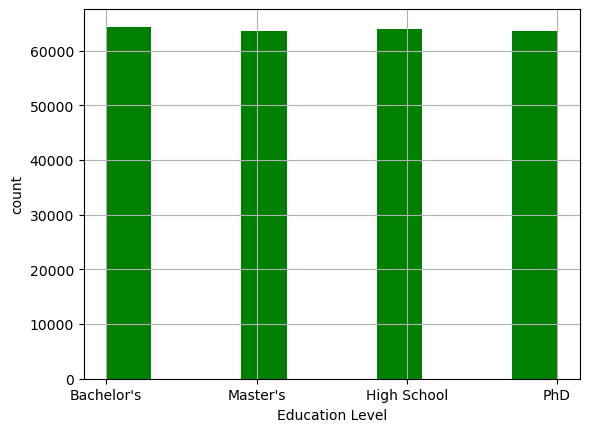

In [8]:
df["Education"].hist(color='g')
plt.xlabel('Education Level')
plt.ylabel('count')
plt.show()


From above graph we can say that for each education level count plot is almost similar.

 Education and EmploymentType categories are ordinal, so used a histogram to visualize the distribution.
  

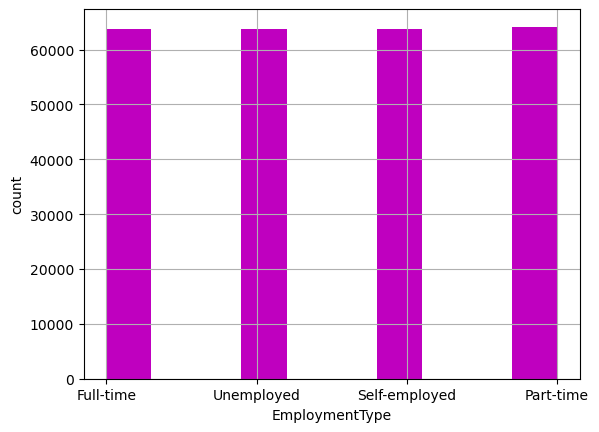

In [9]:
df["EmploymentType"].hist(color='m')
plt.xlabel('EmploymentType')
plt.ylabel('count')
plt.show()

From above graph we can say that for each Employment Type count plot is almost similar.

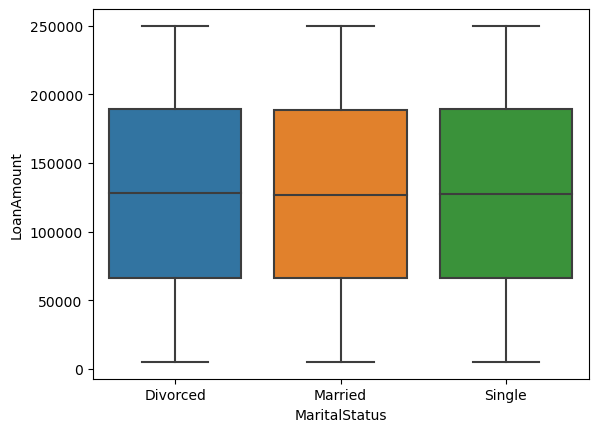

In [10]:
sns.boxplot(x='MaritalStatus', y='LoanAmount', data=df)
plt.show()

 Box plots allow for quick comparison of multiple distributions.

From above graph we can say that MaritalStatus and LoanAmount is almost same.

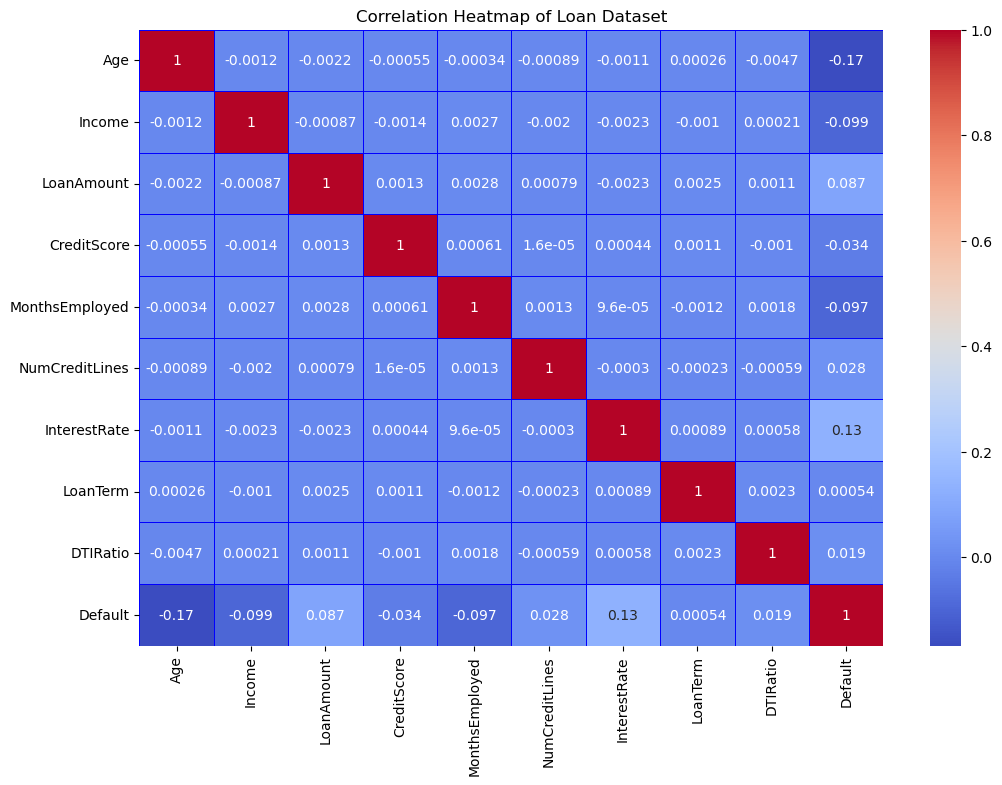

In [11]:
# Assuming 'df' is your DataFrame containing both numeric and non-numeric columns
# Filter numeric columns
numeric_df = df.select_dtypes(include='number')

# Create correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, linecolor="blue")
plt.title("Correlation Heatmap of Loan Dataset")
plt.show()


 Heatmaps are frequently used to visualize the correlation matrix of a dataset.

# Encoding Categorical Variables

In [12]:
encoded = pd.get_dummies(df, columns=['Education','EmploymentType','MaritalStatus', 'HasMortgage','HasDependents','HasDependents',
                                         'LoanPurpose','HasCoSigner'], drop_first=True)

In this code cell, we perform one-hot encoding on categorical variables in the dataset using Pandas' get_dummies() function. Categorical variables such as 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
'HasDependents', 'LoanPurpose', and 'HasCoSigner' are specified in the columns parameter.

One-hot encoding converts categorical variables into binary vectors, where each category becomes a binary column (dummy variable). The drop_first=True parameter is used to drop the first level of each categorical
variable to prevent multicollinearity in the dataset.

The resulting DataFrame df_encoded contains the original numerical features along with the one-hot encoded binary variables representing the different categories of each categorical feature.

In [13]:
encoded

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,False,False,True,True,True,False,False,False,True,True
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,True,False,False,False,False,False,False,False,True,True
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,False,False,True,True,True,False,False,False,False,False
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,True,False,False,False,False,True,False,False,False,False
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,0,...,True,False,False,False,False,False,False,False,True,False
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,...,False,False,False,False,False,False,False,True,False,False
255344,56,84820,208294,597,70,3,5.29,60,0.50,0,...,True,False,True,True,True,False,False,False,False,True
255345,42,85109,60575,809,40,1,20.90,48,0.44,0,...,False,True,True,True,True,False,False,False,True,False


In [14]:
encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  int64  
 1   Income                        255347 non-null  int64  
 2   LoanAmount                    255347 non-null  int64  
 3   CreditScore                   255347 non-null  int64  
 4   MonthsEmployed                255347 non-null  int64  
 5   NumCreditLines                255347 non-null  int64  
 6   InterestRate                  255347 non-null  float64
 7   LoanTerm                      255347 non-null  int64  
 8   DTIRatio                      255347 non-null  float64
 9   Default                       255347 non-null  int64  
 10  Education_High School         255347 non-null  bool   
 11  Education_Master's            255347 non-null  bool   
 12  Education_PhD                 255347 non-nul

# Feature Scaling


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
numerical_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
encoded [numerical_cols] = scaler.fit_transform( encoded [numerical_cols])


# Train Test Split

The "train-test split" is a technique used in machine learning to evaluate the performance of a predictive model. 
It involves splitting the dataset into two separate subsets: one for training the model and one for testing the model's performance.

In [17]:
x = encoded.drop('Default', axis=1)
y = encoded['Default']

x represents the feature matrix (input variables).
y represents the target variable (output variable).

In [18]:
x.head(3)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,...,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,False,...,False,False,True,True,True,False,False,False,True,True
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,False,...,True,False,False,False,False,False,False,False,True,True
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,False,...,False,False,True,True,True,False,False,False,False,False


In [19]:
y.head(3)

0    0
1    0
2    1
Name: Default, dtype: int64

In [20]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.75, random_state=243)

After splitting the data, train the machine learning model on the X_train and y_train datasets and evaluate its performance on the X_test and y_test datasets.

# Addressing Class Imbalance with SMOTE

In [56]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)


In this code cell, we address the issue of class imbalance in the training data using Synthetic Minority Over-sampling Technique (SMOTE).

* SMOTE is implemented using the SMOTE class from the imblearn.over_sampling module.
* We create a SMOTE object smote with a specified random_state for reproducibility.
* The fit_resample() method is then applied to the training features ( X_train ) and labels ( y_train ) to generate synthetic   samples for the minority class (defaulted loans).

SMOTE helps mitigate class imbalance by oversampling the minority class to achieve a more balanced distribution of classes in the training data. This approach prevents the model from being biased towards the majority class
and improves its ability to generalize to unseen data.

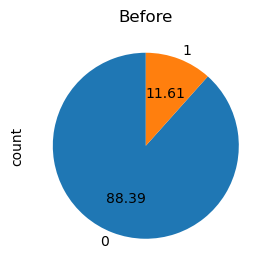

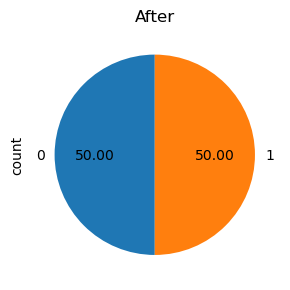

In [57]:
plt.figure(figsize=(3, 5))
df['Default'].value_counts().plot( kind='pie', autopct="%.2f", startangle = 90)
plt.title("Before")
plt.show()
plt.figure(figsize=(3, 5))
y_train.value_counts().plot(kind='pie',autopct="%.2f", startangle = 90)
plt.title("After")
plt.tight_layout()
plt.show()


# Importing Machine Learning Model

# 1. DecisionTreeClassifier

DecisionTreeClassifier is a class in scikit-learn (sklearn) library, which is used to implement decision tree classification algorithms. 
Decision trees are a type of supervised learning algorithm used for classification and regression tasks. 
The DecisionTreeClassifier builds a decision tree model based on the features of the training data and their corresponding target labels.

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
DTC = DecisionTreeClassifier()

In [23]:
DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
y_pred = DTC.predict(x_test)

The predict() method is used to generate predictions for new input data based on the trained model.

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score: This function computes the accuracy of a classification model by comparing the predicted labels to the true labels (target variable or output variable)

In [26]:
accuracy_score(y_test,y_pred)

0.8033689970811076

confusion_matrix: This function generates a confusion matrix, which is a table that summarizes the performance of a classification model.
Confusion matrices are useful for understanding the types of errors made by a model.


In [27]:
confusion_matrix(y_test, y_pred)

array([[148790,  20383],
       [ 17274,   5064]], dtype=int64)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89    169173
           1       0.20      0.23      0.21     22338

    accuracy                           0.80    191511
   macro avg       0.55      0.55      0.55    191511
weighted avg       0.81      0.80      0.81    191511



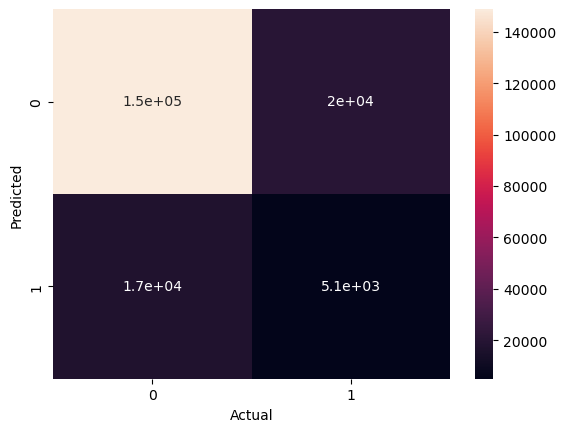

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# 2.LogisticRegression

Logistic Regression is a statistical method used for binary classification tasks. I

In [30]:
from sklearn.linear_model import LogisticRegression 

In [31]:
log_reg = LogisticRegression()

In [32]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [33]:
y_pred = log_reg.predict(x_test)

In [34]:
accuracy_score(y_test, y_pred)

0.8846437019283487

In [35]:
confusion_matrix(y_test, y_pred)

array([[168705,    468],
       [ 21624,    714]], dtype=int64)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94    169173
           1       0.60      0.03      0.06     22338

    accuracy                           0.88    191511
   macro avg       0.75      0.51      0.50    191511
weighted avg       0.85      0.88      0.84    191511



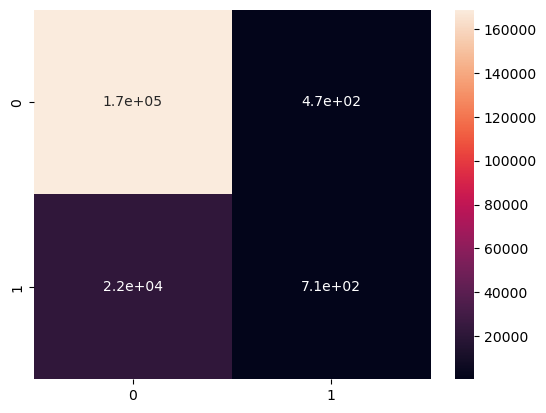

In [37]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

Predict probabilities for each class

In [38]:
y_pred_prob = log_reg.predict_proba(x_test)
y_pred_prob

array([[0.89796674, 0.10203326],
       [0.8340423 , 0.1659577 ],
       [0.97979817, 0.02020183],
       ...,
       [0.62529211, 0.37470789],
       [0.88208101, 0.11791899],
       [0.96814523, 0.03185477]])

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

roc_curve: This function computes the Receiver Operating Characteristic (ROC) curve, which is a graphical representation of the true positive rate (Sensitivity) versus the false positive rate (1 - Specificity) for different threshold values. 

In [40]:
fpr, tpr, th = roc_curve(y_test, y_pred_prob[:,1], pos_label=1)

fpr = False Positive Rate;
trp = True Positive Rate;
th = Threshold

In [41]:
random_prob = [0 for i in range(len(y_test))] #List Compression

In [42]:
rfpr, rtpr, rth = roc_curve(y_test, random_prob, pos_label=1) #random false positive rate

auc_score: This function computes the Area Under the ROC Curve (ROC AUC), which is a scalar value representing the area under the ROC curve. 
The ROC AUC provides a single-number summary of the model's performance.

auc_score calculates the ROC AUC score based on the predicted probabilities (y_pred_prob) and the true labels (y_test). 

In [43]:
auc_score = roc_auc_score(y_test, y_pred_prob[:,1])
auc_score

0.7483267424894202

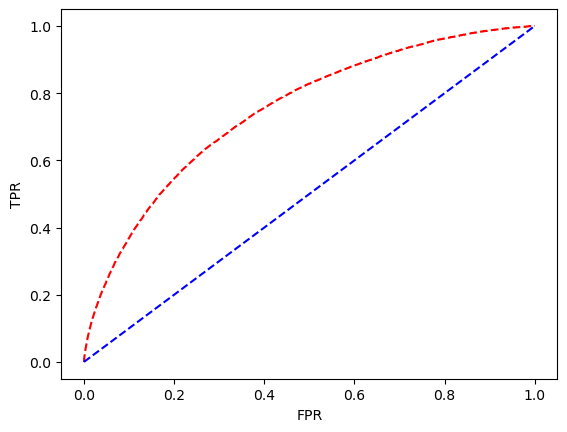

In [44]:
plt.plot(fpr, tpr, linestyle="--", color="red")
plt.plot(rfpr, rtpr, linestyle="--", color="blue")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# 3.RandomForestClassifier

Random Forest is a popular ensemble learning technique used for both classification and regression tasks. The RandomForestClassifier is a specific implementation of the Random Forest algorithm for classification tasks.

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model = RandomForestClassifier(n_estimators=20, max_depth=2)

In [47]:
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=20)

In [48]:
y_pred = model.predict(x_test)

In [49]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
accuracy_score(y_test, y_pred)

0.8833591804126134

In [51]:
confusion_matrix(y_test, y_pred)

array([[169173,      0],
       [ 22338,      0]], dtype=int64)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94    169173
           1       0.00      0.00      0.00     22338

    accuracy                           0.88    191511
   macro avg       0.44      0.50      0.47    191511
weighted avg       0.78      0.88      0.83    191511



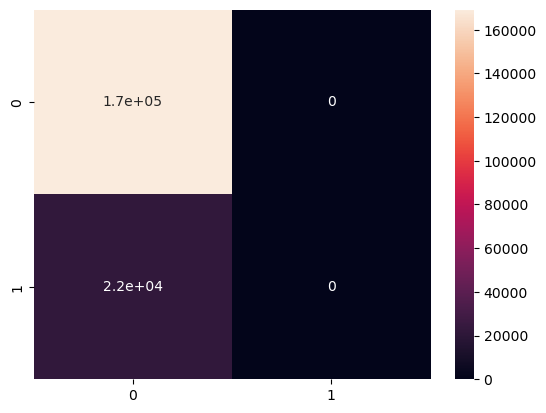

In [53]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

# Calculating AUC Scores for Models

In [54]:
from sklearn.metrics import roc_curve, auc
models = {
    'DTC' : DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
 
}
auc_scores = {}
for name, model in models.items():
 model.fit(x_train, y_train)
 y_pred = model.predict_proba(x_test)[:,1]
 fpr, tpr, thresholds = roc_curve(y_test, y_pred)
 auc_score = auc(fpr, tpr)
 auc_scores[name] = auc_score


In this code cell, we calculate the Area Under the Receiver Operating Characteristic Curve (AUC) scores for each trained model. AUC is a metric that evaluates the performance of a binary classification model, representing the
model's ability to distinguish between positive and negative classes.

We define a dictionary models containing various machine learning classifiers initialized with their default parameters. These classifiers include Logistic Regression, Random Forest, XGBoost, K-Nearest Neighbors (KNN),
Naive Bayes, and Decision Tree Classifier (DTC).

We then loop through each model in the dictionary, train it on the resampled training data ( X_train , y_train ), make probabilistic predictions on the test data ( X_test ), and calculate the AUC score using the
roc_curve() and auc() functions from scikit-learn's metrics module.

The AUC scores are stored in the dictionary auc_scores with the model names as keys. Higher AUC scores indicate better discriminative ability of the model.

# Plotting ROC Curves for Models

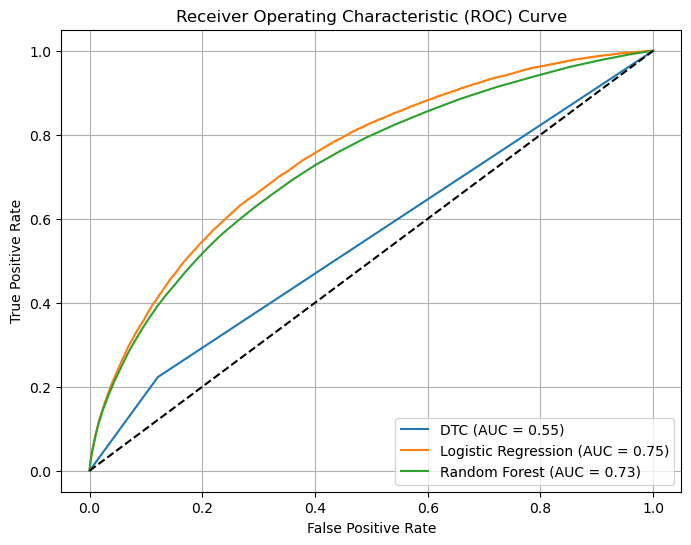

In [55]:
plt.figure(figsize=(8, 6))
for name, model in models.items():
 model.fit(x_train, y_train)
 y_pred = model.predict_proba(x_test)[:,1]
 fpr, tpr, _ = roc_curve(y_test, y_pred)
 auc_score = auc(fpr, tpr)
 plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
# Plot ROC curve for random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Conclusion

a) we used three machine learning model for loan prediction which are DecisionTreeClassifier, LositicRegression, RandomForestClassifier.

b) The high accuracy achieved by the LogisticRegression model which is 88.34%.

c) The accuracy of RandomForestClassifier model is 88.33% which almost similar to the accuracy of LogisticRegression model.

d) Then the accuracy of DecisionTreeClassifier model is 80.33%.